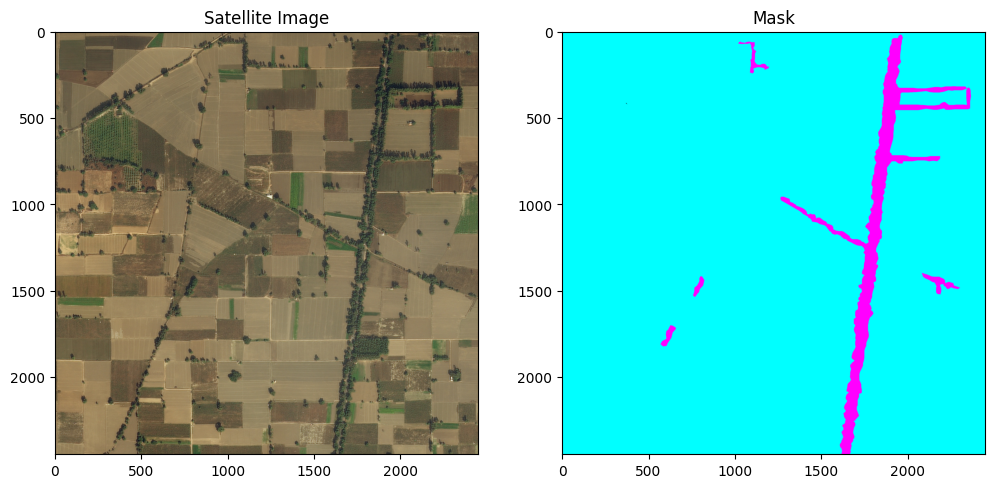

In [11]:
import os
import cv2
import matplotlib.pyplot as plt

# Set your base path
base_path = "../data/train"  # adjust if needed

# Pick a sample file
sample_id = os.listdir(base_path)[0].split('_')[0]  # gets a random id like '123'

# File paths
image_path = os.path.join(base_path, f"{sample_id}_sat.jpg")
mask_path = os.path.join(base_path, f"{sample_id}_mask.png")

# Load images
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = cv2.imread(mask_path)

# Show both
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Satellite Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Mask")
plt.imshow(mask)

plt.show()

In [12]:
import pandas as pd

class_dict = pd.read_csv("../class_dict.csv")
print(class_dict)

               name    r    g    b
0        urban_land    0  255  255
1  agriculture_land  255  255    0
2         rangeland  255    0  255
3       forest_land    0  255    0
4             water    0    0  255
5       barren_land  255  255  255
6           unknown    0    0    0


In [13]:
import pandas as pd
import numpy as np
from PIL import Image


# Build the color to class ID mapping
color_to_class = {}
for i, row in class_dict.iterrows():
    rgb = (row['r'], row['g'], row['b'])
    color_to_class[rgb] = i  # class ID is the row index

# Load the mask image
mask = Image.open(mask_path).convert('RGB')
mask_np = np.array(mask)

# Create empty class ID mask
class_id_mask = np.zeros((mask_np.shape[0], mask_np.shape[1]), dtype=np.uint8)

# Map RGB values to class IDs
for rgb, class_id in color_to_class.items():
    matches = np.all(mask_np == rgb, axis=-1)
    class_id_mask[matches] = class_id

# Optional: visualize or save class_id_mask
Image.fromarray(class_id_mask).show()

In [14]:
print(class_dict.columns)

Index(['name', 'r', 'g', 'b'], dtype='object')


In [15]:
# Print out the color and their respective class IDs
for i, row in class_dict.iterrows():
    rgb = (row['r'], row['g'], row['b'])  # The RGB value for the class
    print(f"Color (RGB: {rgb}) is Class ID: {i}")

Color (RGB: (0, 255, 255)) is Class ID: 0
Color (RGB: (255, 255, 0)) is Class ID: 1
Color (RGB: (255, 0, 255)) is Class ID: 2
Color (RGB: (0, 255, 0)) is Class ID: 3
Color (RGB: (0, 0, 255)) is Class ID: 4
Color (RGB: (255, 255, 255)) is Class ID: 5
Color (RGB: (0, 0, 0)) is Class ID: 6


In [16]:
print("Unique class IDs in the mask:", np.unique(class_id_mask))

Unique class IDs in the mask: [1 2 6]


In [17]:
import pandas as pd

class_dict = pd.read_csv("../class_dict.csv")
class_dict.columns = class_dict.columns.str.strip().str.lower()

for i, row in class_dict.iterrows():
    print(f"ID {i} => RGB ({row['r']}, {row['g']}, {row['b']})")

ID 0 => RGB (0, 255, 255)
ID 1 => RGB (255, 255, 0)
ID 2 => RGB (255, 0, 255)
ID 3 => RGB (0, 255, 0)
ID 4 => RGB (0, 0, 255)
ID 5 => RGB (255, 255, 255)
ID 6 => RGB (0, 0, 0)


In [18]:
import pandas as pd
import numpy as np
from PIL import Image

# Load the class dictionary
class_dict = pd.read_csv("../class_dict.csv")
class_dict.columns = class_dict.columns.str.strip().str.lower()  # clean column names

# Print to confirm columns
print("CSV columns:", class_dict.columns.tolist())

# Build the color → class ID mapping (using row index as ID)
color_to_class = {}
for idx, row in class_dict.iterrows():
    rgb = (int(row['r']), int(row['g']), int(row['b']))
    color_to_class[rgb] = idx
    print(f"Mapping color {rgb} to class ID {idx}")

# Load the mask
mask = Image.open(mask_path).convert('RGB')
mask_np = np.array(mask)

# Show unique RGBs in the mask image
unique_colors = np.unique(mask_np.reshape(-1, 3), axis=0)
print("Unique colors in mask:", unique_colors)

# Now create a blank class ID mask
class_id_mask = np.zeros((mask_np.shape[0], mask_np.shape[1]), dtype=np.uint8)

# Map RGBs to class IDs
for rgb, class_id in color_to_class.items():
    matches = np.all(mask_np == rgb, axis=-1)
    class_id_mask[matches] = class_id

# Show the resulting unique class IDs in the mask
print("Class IDs in the final mask:", np.unique(class_id_mask))

# Visualize the mask
Image.fromarray(class_id_mask).show()

CSV columns: ['name', 'r', 'g', 'b']
Mapping color (0, 255, 255) to class ID 0
Mapping color (255, 255, 0) to class ID 1
Mapping color (255, 0, 255) to class ID 2
Mapping color (0, 255, 0) to class ID 3
Mapping color (0, 0, 255) to class ID 4
Mapping color (255, 255, 255) to class ID 5
Mapping color (0, 0, 0) to class ID 6
Unique colors in mask: [[  0   0   0]
 [255   0 255]
 [255 255   0]]
Class IDs in the final mask: [1 2 6]


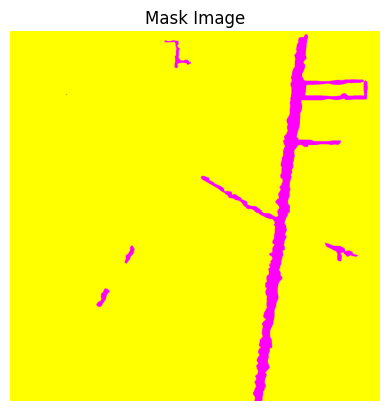

Unique RGB values: [[  0   0   0]
 [255   0 255]
 [255 255   0]]


In [19]:
import matplotlib.pyplot as plt

# Show the mask
plt.imshow(mask_np)
plt.title("Mask Image")
plt.axis('off')
plt.show()

# Check unique RGB values in the mask again
print("Unique RGB values:", np.unique(mask_np.reshape(-1, 3), axis=0))

In [20]:
import os
import numpy as np
from PIL import Image

# Path to the training data
train_path = 'E:/deeoglobe/data/train'  

# List of image and mask files
image_files = [f for f in os.listdir(train_path) if f.endswith('_sat.jpg')]  
mask_files = [f for f in os.listdir(train_path) if f.endswith('_mask.png')]  

# Sort both lists to make sure images and masks are correctly paired
image_files.sort()
mask_files.sort()

# Function to convert mask to class ID
def convert_mask_to_class_id(mask):
    # Define the color-to-class mapping
    color_to_class = {
        (0, 255, 255): 0,  # Urban land
        (255, 255, 0): 1,  # Agriculture land
        (255, 0, 255): 2,  # Rangeland
        (0, 255, 0): 3,    # Forest land
        (0, 0, 255): 4,    # Water
        (255, 255, 255): 5,  # Barren land
        (0, 0, 0): 6       # Unknown
    }
    
    mask_np = np.array(mask)
    class_id_mask = np.zeros((mask_np.shape[0], mask_np.shape[1]), dtype=np.uint8)

    # Iterate over each class color and map it to the corresponding class ID
    for rgb, class_id in color_to_class.items():
        matches = np.all(mask_np == rgb, axis=-1)
        class_id_mask[matches] = class_id
    
    return class_id_mask

# Prepare dataset by loading images and masks
images = []
masks = []

for image_file, mask_file in zip(image_files, mask_files):
    # Load the image and convert to RGB if necessary
    image = Image.open(os.path.join(train_path, image_file)).convert('RGB')  # Convert image to RGB
    image = image.resize((256, 256))  
    image_array = np.array(image)
    
    # Use np.memmap for large arrays (e.g., large images)
    image_memmap = np.memmap(f'image_data_{image_file}.dat', dtype='float32', mode='w+', shape=image_array.shape)
    np.copyto(image_memmap, image_array)  # Store image data in the memmap
    images.append(image_memmap)
    
    # Load the mask (it should already be in RGB format)
    mask = Image.open(os.path.join(train_path, mask_file))
    class_id_mask = convert_mask_to_class_id(mask)  # Convert mask RGB to class IDs
    
    # Use np.memmap for large arrays (e.g., large masks)
    mask_memmap = np.memmap(f'mask_data_{mask_file}.dat', dtype='uint8', mode='w+', shape=class_id_mask.shape)
    np.copyto(mask_memmap, class_id_mask)  # Store mask data in the memmap
    masks.append(mask_memmap)

# Now you have memory-mapped arrays for both images and masks
# These can be used for training or further processing
print(f"Loaded {len(images)} images and {len(masks)} masks using np.memmap")

Loaded 803 images and 803 masks using np.memmap


In [21]:
image_paths = [f'image_data_{f}.dat' for f in image_files]
mask_paths = [f'mask_data_{f}.dat' for f in mask_files]

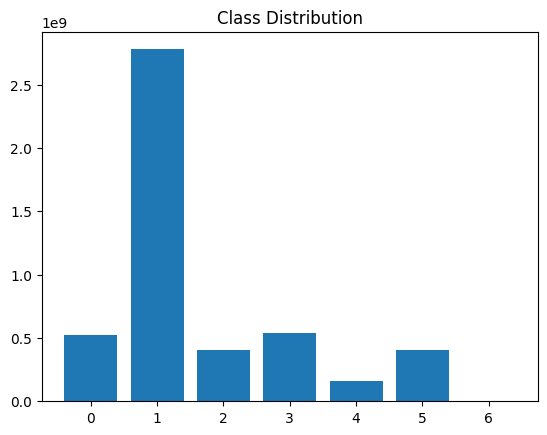

In [22]:
all_class_ids = np.concatenate([mask.flatten() for mask in masks])
plt.hist(all_class_ids, bins=np.arange(8)-0.5, rwidth=0.8)
plt.xticks(range(7))
plt.title("Class Distribution")
plt.show()


In [23]:
import torch

# Replace these with your actual pixel counts from the histogram
class_counts = torch.tensor([5.5e8, 2.75e9, 4.0e8, 5.5e8, 1.5e8, 4.0e8])
class_weights = 1.0 / class_counts
class_weights = class_weights / class_weights.sum()  # Normalize

loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights, ignore_index=6)


In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.optim.lr_scheduler import StepLR
import numpy as np
from tqdm import tqdm

In [25]:
# ----------- Augmentation (for RGB) ----------
image_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
])

mask_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.PILToTensor(),  # <- this converts to (1, H, W) tensor
])


In [26]:
class DiceLoss(nn.Module):
    def __init__(self, smooth=1):
        super().__init__()
        self.smooth = smooth

    def forward(self, inputs, targets):
        inputs = torch.softmax(inputs, dim=1)
        targets_one_hot = torch.nn.functional.one_hot(targets, num_classes=inputs.shape[1]).permute(0, 3, 1, 2).float()
        intersection = (inputs * targets_one_hot).sum(dim=(2, 3))
        union = inputs.sum(dim=(2, 3)) + targets_one_hot.sum(dim=(2, 3))
        dice = (2. * intersection + self.smooth) / (union + self.smooth)
        return 1 - dice.mean()


In [27]:
def combined_loss(preds, targets, ce_loss_fn, dice_loss_fn):
    return ce_loss_fn(preds, targets) + dice_loss_fn(preds, targets)

In [34]:
from torch.utils.data import Dataset
import numpy as np
from PIL import Image
import torch

class MemmapSegmentationDataset(Dataset):
    def __init__(self, image_paths, mask_paths, transform_img=None, transform_mask=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform_img = transform_img
        self.transform_mask = transform_mask

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load memory-mapped image and mask
        image = np.memmap(self.image_paths[idx], dtype='float32', mode='r', shape=(256, 256, 3))
        mask = np.memmap(self.mask_paths[idx], dtype='uint8', mode='r', shape=(256, 256))

        # Convert to PIL images
        image = Image.fromarray(image.astype(np.uint8))
        mask = Image.fromarray(mask.astype(np.uint8), mode='L')  # grayscale for class IDs

        # Apply transformations if provided
        if self.transform_img:
            image = self.transform_img(image)
        else:
            image = torch.from_numpy(np.array(image)).permute(2, 0, 1).float() / 255.0

        if self.transform_mask:
            mask = self.transform_mask(mask)
        else:
            # Ensure the mask is 2D and convert to tensor (int64 for CrossEntropyLoss)
            mask = torch.from_numpy(np.array(mask)).long()

        # Ensure the mask is 2D with shape (height, width) [batch_size, height, width]
        mask = mask.squeeze(0)  # In case the mask has an extra dimension from transforms

        return image, mask


In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DoubleConv(nn.Module):
    """(Conv => BN => ReLU) * 2"""
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),

            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class UNet(nn.Module):
    def __init__(self, in_channels=3, num_classes=7):
        super(UNet, self).__init__()

        # Encoder
        self.down1 = DoubleConv(in_channels, 64)
        self.pool1 = nn.MaxPool2d(2)

        self.down2 = DoubleConv(64, 128)
        self.pool2 = nn.MaxPool2d(2)

        self.down3 = DoubleConv(128, 256)
        self.pool3 = nn.MaxPool2d(2)

        self.down4 = DoubleConv(256, 512)
        self.pool4 = nn.MaxPool2d(2)

        # Bottleneck
        self.bottleneck = DoubleConv(512, 1024)

        # Decoder
        self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = DoubleConv(1024, 512)

        self.up3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = DoubleConv(512, 256)

        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = DoubleConv(256, 128)

        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = DoubleConv(128, 64)

        # Final layer
        self.final = nn.Conv2d(64, num_classes, kernel_size=1)

    def forward(self, x):
        # Encoder
        d1 = self.down1(x)
        d2 = self.down2(self.pool1(d1))
        d3 = self.down3(self.pool2(d2))
        d4 = self.down4(self.pool3(d3))

        # Bottleneck
        bn = self.bottleneck(self.pool4(d4))

        # Decoder
        up4 = self.up4(bn)
        up4 = torch.cat([up4, d4], dim=1)
        up4 = self.dec4(up4)

        up3 = self.up3(up4)
        up3 = torch.cat([up3, d3], dim=1)
        up3 = self.dec3(up3)

        up2 = self.up2(up3)
        up2 = torch.cat([up2, d2], dim=1)
        up2 = self.dec2(up2)

        up1 = self.up1(up2)
        up1 = torch.cat([up1, d1], dim=1)
        up1 = self.dec1(up1)

        return self.final(up1)


In [33]:
from torch.utils.data import DataLoader
import glob

# Paths to memmap files 
image_paths = sorted(glob.glob(r"E:\deeoglobe\data\\image\*.dat"))
mask_paths = sorted(glob.glob(r"E:\deeoglobe\data\\mask\*.dat"))

train_dataset = MemmapSegmentationDataset(
    image_paths=image_paths,
    mask_paths=mask_paths,
    transform_img=image_transform,
    transform_mask=mask_transform
)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)


In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNet(in_channels=3, num_classes=7).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)



In [40]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_pixels = 0
    total_pixels = 0

    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.squeeze(1).long().to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = loss_fn(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # 🧠 Get predicted class per pixel
        preds = torch.argmax(outputs, dim=1)

        # ✅ Count correct predictions
        correct_pixels += (preds == masks).sum().item()
        total_pixels += masks.numel()

    avg_loss = running_loss / len(train_loader)
    accuracy = correct_pixels / total_pixels * 100

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")


Epoch [1/10], Loss: 1.4816, Accuracy: 55.53%
Epoch [2/10], Loss: 1.3459, Accuracy: 56.79%
Epoch [3/10], Loss: 1.3035, Accuracy: 56.85%
Epoch [4/10], Loss: 1.2645, Accuracy: 57.14%
Epoch [5/10], Loss: 1.2541, Accuracy: 58.03%
Epoch [6/10], Loss: 1.2172, Accuracy: 59.84%
Epoch [7/10], Loss: 1.2057, Accuracy: 60.33%
Epoch [8/10], Loss: 1.1899, Accuracy: 60.87%
Epoch [9/10], Loss: 1.1763, Accuracy: 61.60%
Epoch [10/10], Loss: 1.1593, Accuracy: 62.39%
